In [4]:
from projects.NeuralForceField.train import *
import numpy as np
from sklearn.utils import shuffle
from projects.NeuralForceField.graphs import * 
import json


In [5]:
data = pickle.load(open('/home/wwj/data/lipoly/COCCOC.[Li+]_neural.pkl', "rb" ) )

xyz_data = []
force_data = []
energy_data = []
smiles_data = []

for item in data:
    xyz_data.append(item[0]) 
    force_data.append(item[1])
    energy_data.append(item[2])
    smiles_data.append(item[3])

In [6]:
graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, smiles_data=smiles_data, batch_size=1, cutoff=5.0,
                             force_data=force_data, au_flag=True)

Finished Batching 79 Batches


In [7]:
graph_data.label_mean

-13.422125029641144

In [8]:
with open('/home/wwj/Repo/sandbox/lipoly_peo_exp/log/COCCOC+COCCOC.[Li+]_0306/par.json') as f:
    par = json.load(f)

par["model_type"] = "schnet"
par["git_commit"] = 'junk'

In [9]:
model = Model(par=par, train_flag=False, device=1, job_name="COCCOC.[Li+]_val", graph_batching=True, root='./log/')


need to load a pre-trained model


In [12]:
model.model.load_state_dict(torch.load("/home/wwj/Repo/sandbox/lipoly_peo_exp/log/COCCOC+COCCOC.[Li+]_NN_NMS_0310/model.pt"))

force_MAE 0.3793882 kcal/mol A
energy_MAE 0.18869823 kcal/mol


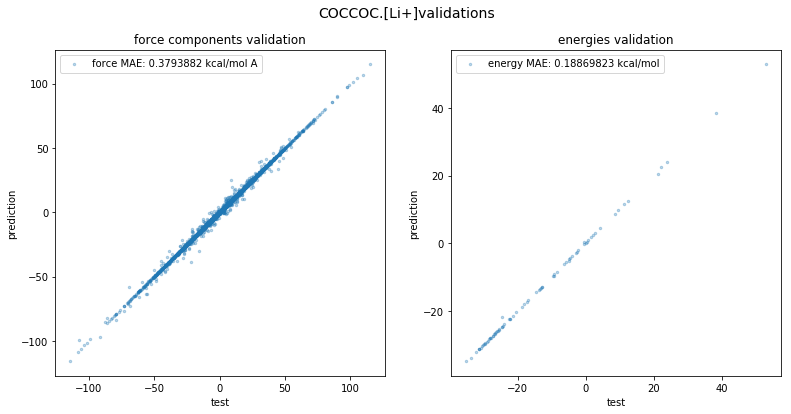

In [13]:
model.validate(graph_data)